# SVD奇異值分解(Singular Value Decomposition)
- 利用分散式表示法來表示字詞，除了之前用統計機率方式計算的PMI之外，還可以利用矩陣方式計算的SVD
- SVD是透過矩陣的奇異值分解成U、S、V三個矩陣，來找出字詞之間的高維隱含關係(U、S、V各代表字詞不同的隱含關係)
- 本範例是計算PMI範例並進行SVD分解，然後畫出字詞U矩陣，讓同學了解字詞之間的關係

In [7]:
#colab 進行matplotlib繪圖時顯示繁體中文
#下載台北思源黑體並命名taipei_sans_tc_beta.ttf,移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

#改style要在改font之前
#plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font',family='Taipei Sans TC Beta')

--2022-04-17 16:28:04--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.157.139, 142.250.157.100, 142.250.157.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f6o3heavkdqi9f0pdhhb0eiltu1lb9qo/1650212850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-17 16:28:08--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f6o3heavkdqi9f0pdhhb0eiltu1lb9qo/1650212850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.1

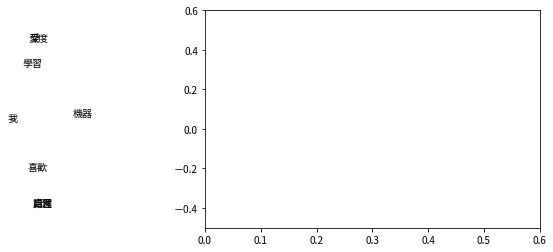

In [9]:
# Defined in Section 2.1.2

import numpy as np

M=np.array([[0,2,1,1,1,1,1,2,1,3],
              [2,0,1,1,1,0,0,1,1,2],
              [1,1,0,1,1,0,0,0,0,1],
              [1,1,1,0,1,0,0,0,0,1],
              [1,1,1,1,0,0,0,0,0,1],
              [1,0,0,0,0,0,1,1,0,1],
              [1,0,0,0,0,1,0,1,0,1],
              [2,1,0,0,0,1,1,0,1,2],
              [1,1,0,0,0,0,0,1,0,1],
              [3,2,1,1,1,1,1,2,1,0]])

def pmi(M,positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total=col_totals.sum()
    expected=np.outer(row_totals,col_totals)/total
    M=M/expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        m=np.log(M)
    M[np.isinf(M)]=0.0 #log(0)=0
    if positive:
        M[M<0]=0.0
    return M

M_pmi=pmi(M)

np.set_printoptions(precision=2)
U,s,Vh=np.linalg.svd(M_pmi)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

words=["我","喜歡","自然","語言","處理","愛","深度","學習","機器","。"]

for i in range(len(words)):
    plt.text(U[i,0],U[i,1],words[i])
plt.xlim(0,0.6)
plt.ylim(-0.5,0.6)
plt.show()